<h1>
    <p style="color:blue; text-align:center; border:2px solid Tomato; font-size:180%;">
        <i>
NLP - Wordcloud - Twitter data
        </i>
    </p>
</h1>

<h1>
    <p style="color:red; text-align:center; border:2px solid blue; font-size:140%;">
        <i>
Protest of Farmers
        </i>
    </p>
</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install --user -U nltk

Requirement already up-to-date: nltk in c:\users\dev\appdata\roaming\python\python38\site-packages (3.6.2)


In [3]:
!pip install --upgrade nltk

Requirement already up-to-date: nltk in c:\users\dev\appdata\roaming\python\python38\site-packages (3.6.2)


In [4]:
# os.chdir(r"C:\Users\DEV\Documents\Sahil Documents\IMS Proschool\Term 2\NLP")

In [5]:
data=pd.read_csv("farmer.csv")
data.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,BeantMrahar,NaN,Twitter for Android,NaN,2021-04-12 03:13:34,False,63,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...,0,False
1,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:32,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
2,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:21,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
3,drd_bee,ਮੋਗਾ (ਚੜ੍ਹਦਾ ਪੰਜਾਬ),Twitter for Android,NaN,2021-04-12 03:13:21,False,628,"If we lose this fight, first we will become co...",0,False
4,__Argha__,NaN,Twitter for Android,NaN,2021-04-12 03:13:18,False,42,'Disgraceful' and 'Discourteous' act of Delhi ...,0,False


In [6]:
data.shape

(1000, 10)

In [7]:
data.drop_duplicates(subset=None, keep="first", inplace=True)
data.shape

(1000, 10)

In [8]:
data.head()

,user,location,source,place,created_at,geo_enabled,friends_count,text,retweet_count,retweeted_status
0,BeantMrahar,NaN,Twitter for Android,NaN,2021-04-12 03:13:34,False,63,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...,0,False
1,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:32,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
2,rumsomal,"brampton, universe",Twitter for Android,NaN,2021-04-12 03:13:21,False,1328,Delhi police is the Black Hand of BJP \n#Delhi...,0,False
3,drd_bee,ਮੋਗਾ (ਚੜ੍ਹਦਾ ਪੰਜਾਬ),Twitter for Android,NaN,2021-04-12 03:13:21,False,628,"If we lose this fight, first we will become co...",0,False
4,__Argha__,NaN,Twitter for Android,NaN,2021-04-12 03:13:18,False,42,'Disgraceful' and 'Discourteous' act of Delhi ...,0,False


In [9]:
data=pd.DataFrame(data.text)

In [10]:
data.head()

,text
0,Today Hashtag \nRetweet \n\n#DelhiPolice_Tortu...
1,Delhi police is the Black Hand of BJP \n#Delhi...
2,Delhi police is the Black Hand of BJP \n#Delhi...
3,"If we lose this fight, first we will become co..."
4,'Disgraceful' and 'Discourteous' act of Delhi ...


In [11]:
data.iloc[991,0]

'Delhi police arresting people from Punjab that does belong to their jurisdiction. Is Punjab Govt sleeping?… https://t.co/CNTIUpPXBO'

# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [12]:
data.text=data.text.str.lower()

In [13]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction. is punjab govt sleeping?… https://t.co/cntiuppxbo'

# Step 2 :- Punctuation

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [16]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction. is punjab govt sleeping?… https://t.co/cntiuppxbo'

In [17]:
data['text']=data['text'].apply(lambda x : remove_punctuation(x))

In [18]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… httpstcocntiuppxbo'

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [19]:
data['text'] = data['text'].str.replace(r'http\S+|www.\S+','',case=False)
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… '

# Remove Number

In [20]:
data.iloc[57,0]

'bhupinderq33n tractor2twitr gillsukhmani111 navdeepsingh77 harshkumarbhal1 monicagill1 mahuamoitra… '

* \d == Returns a match where the string contains digits (numbers from 0-9)
* (+) == one or more occurance

In [21]:
data['text'] = data['text'].str.replace('\d+','')

In [22]:
data.iloc[57,0]

'bhupinderqn tractortwitr gillsukhmani navdeepsingh harshkumarbhal monicagill mahuamoitra… '

# Removing Stop Words

In [23]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
data.iloc[991,0]

'delhi police arresting people from punjab that does belong to their jurisdiction is punjab govt sleeping… '

In [25]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                      if word not in (stop)]))

In [26]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

# Common Words

In [27]:
data.iloc[991,0]

'delhi police arresting people punjab belong jurisdiction punjab govt sleeping…'

In [28]:
import re
nltk.download('words')
words = set(nltk.corpus.words.words())
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('delhipolicetorturingfarmers|delhipolice|police|delhi', '', text) #remove delhipolice
    text =  re.sub('farmer|farmers|farm|farmed','', text) #remove farmers
    text =  re.sub('protests|protest','', text) #remove Protest
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or is 
    text =  " ".join(w for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                    if w.lower() in words)  #
    
    return text
round2 = lambda x: clean_text_round2(x)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [29]:
# Let's take a look at the updated text
#data['text']=data['text'].apply(lambda x : clean_text_round2(x))
data = pd.DataFrame(data.text.apply(round2))
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

# Lemmatization

In [30]:
from nltk.stem import WordNetLemmatizer 

nltk.download('wordnet')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DEV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [32]:
data.iloc[991,0]

'arresting people belong jurisdiction sleeping'

In [33]:
data['text'] = data.text.apply(lambda x :' '.join(lemmatize_text(x)))
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

# Strip extra whitespace

In [34]:
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

In [35]:
data['text'] = (data['text'].astype("str").str.rstrip())
data.iloc[991,0]

'arrest people belong jurisdiction sleep'

# Term Document Matrix

In [36]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,freq
abduct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abuse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
accept,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,freq
0,abduct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,9
1,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,abuse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,accept,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

,Word,freq
651,torture,221
611,support,87
593,stand,86
599,stop,80
47,beat,65
553,shame,62
662,try,57
244,firm,52
331,intimidate,51
169,desperation,51


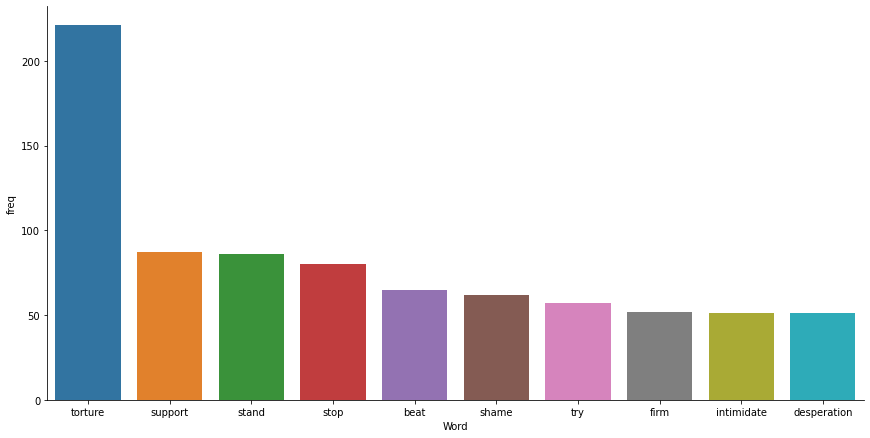

In [40]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=50] 
fg = sns.factorplot(x='Word', y='freq',
                        size=6,  aspect=2,
                        kind='bar', 
                        data=w)

# Word Cloud 

In [41]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 27192 words in the combination of all review.


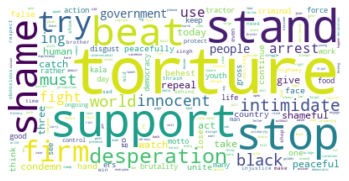

In [42]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      #max_words=20
                     ).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Customize Wordcloud

In [43]:
# import os 
# os.chdir(r"<PATH>") 

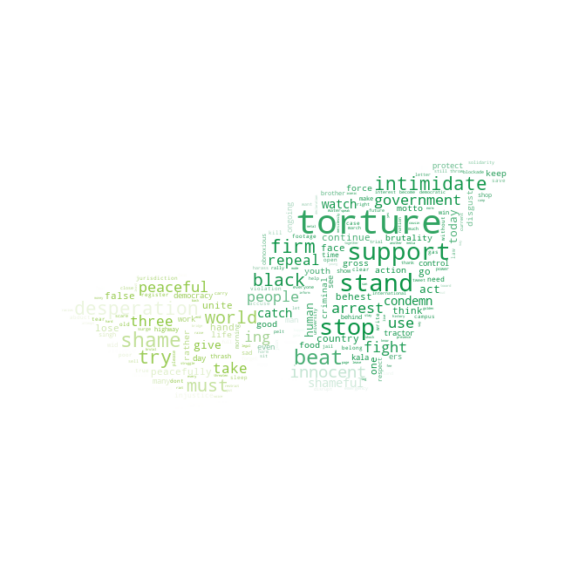

In [44]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("leaf.jpeg"))
wordcloud_full = WordCloud(stopwords=stopwords,
                           background_color='white',
                           mode="RGBA",
                           max_words=30000,
                           mask=mask,
                           collocations=False
                          ).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

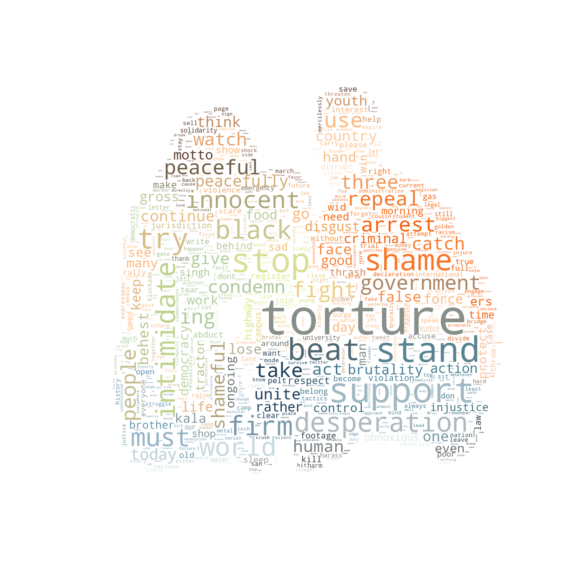

In [45]:
# Generate a word cloud image
from PIL import Image

mask = np.array(Image.open("family.jpeg"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='White',
                           mode="RGBA",
                           max_words=27000,
                           mask=mask,
                           collocations=False).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])  # facecolor='k' to give round box
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis

In [46]:
print(data.shape)
data.head()

(1000, 1)


,text
0,today
1,black hand
2,black hand
3,lose fight first become corporate eventually c...
4,disgraceful discourteous act towards whose str...


In [47]:
# dropping duplicate values:
data.drop_duplicates(subset=None, keep="first", inplace=True)
print(data.shape)

(538, 1)


In [48]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # polarity range -1 to +1
data['polarity'] = data['text'].apply(pol)
data.head(5)

,text,polarity
0,today,0.000000
1,black hand,-0.166667
3,lose fight first become corporate eventually c...,0.125000
4,disgraceful discourteous act towards whose str...,-0.650000
5,shameful disgust act,0.000000


In [49]:
data['Sentiment'] = np.where(data['polarity']>=0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,today,0.000000,Positive
1,black hand,-0.166667,Negative
3,lose fight first become corporate eventually c...,0.125000,Positive
4,disgraceful discourteous act towards whose str...,-0.650000,Negative
5,shameful disgust act,0.000000,Positive


In [50]:
data['Sentiment2'] = np.where(data['polarity']<0, 'Negative',np.where(data['polarity']>0, 'Positive','Neutral'))
data.head()

,text,polarity,Sentiment,Sentiment2
0,today,0.000000,Positive,Neutral
1,black hand,-0.166667,Negative,Negative
3,lose fight first become corporate eventually c...,0.125000,Positive,Positive
4,disgraceful discourteous act towards whose str...,-0.650000,Negative,Negative
5,shameful disgust act,0.000000,Positive,Neutral


Positive    445
Negative     93
Name: Sentiment, dtype: int64


<AxesSubplot:>

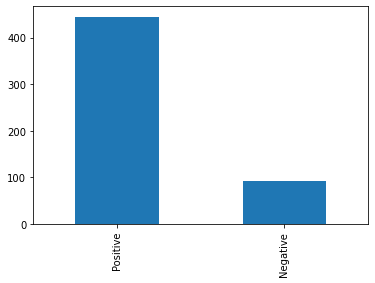

In [51]:
print(data.Sentiment.value_counts())
data.Sentiment.value_counts().plot.bar()

<AxesSubplot:ylabel='Sentiment'>

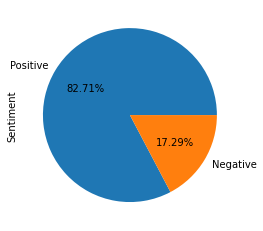

In [52]:
data.Sentiment.value_counts().plot.pie(autopct='%.2f%%')

Neutral     282
Positive    163
Negative     93
Name: Sentiment2, dtype: int64


<AxesSubplot:>

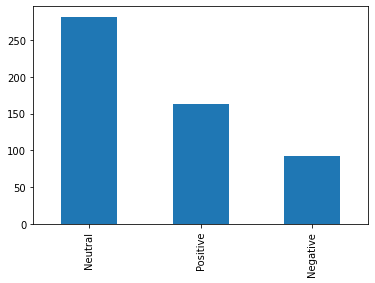

In [53]:
print(data.Sentiment2.value_counts())
data.Sentiment2.value_counts().plot.bar()

<AxesSubplot:ylabel='Sentiment2'>

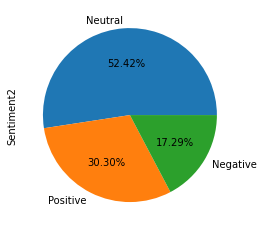

In [54]:
data.Sentiment2.value_counts().plot.pie(autopct='%.2f%%')

# TF-IDF Matrix

In [55]:
data['tokenized_words'] = data['text'].apply(lambda x: x.split())
data.head()

,text,polarity,Sentiment,Sentiment2,tokenized_words
0,today,0.000000,Positive,Neutral,[today]
1,black hand,-0.166667,Negative,Negative,"[black, hand]"
3,lose fight first become corporate eventually c...,0.125000,Positive,Positive,"[lose, fight, first, become, corporate, eventu..."
4,disgraceful discourteous act towards whose str...,-0.650000,Negative,Negative,"[disgraceful, discourteous, act, towards, whos..."
5,shameful disgust act,0.000000,Positive,Neutral,"[shameful, disgust, act]"


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

#setting that you use for count vertorizer will go here
tfidf_vertorizer = TfidfVectorizer(use_idf=True, stop_words='english', analyzer='word')

#just send in all yourdocs here
tfidf_vertorizer_vertors = tfidf_vertorizer.fit_transform(data.text)
feature_names = cv.get_feature_names()  # every word name

In [57]:
output = pd.DataFrame.sparse.from_spmatrix(tfidf_vertorizer_vertors, columns=feature_names)
output

,abduct,able,absolutely,abuse,accept,acceptable,accomplish,accuse,act,action,...,wouldnt,wow,wrath,write,wrong,yes,yesterday,young,youth,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.347247,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.557317,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.351783,0.0,0.0,0.0
536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [58]:
max_value = output.max(axis=1)
print(max_value)

0      1.000000
1      0.784630
2      0.505210
3      0.484815
4      0.630337
         ...   
533    0.598830
534    0.717088
535    0.374822
536    0.734630
537    0.747374
Length: 538, dtype: float64


### Conclusion:
We successfully performed following tasks:
* **Fetched Tweets** from Twitter.
* Tweets **Data Cleaning/ Pre-processing** using NLP libraries like nltk, sklearn.
* **Word Cloud** formation showing current trending topics.
* **Sentiment Analysis** of Tweets
* **TF-IDF matrix** showing importance of words in corpus of Tweets.